# Data science en La Liga

## Tratos de favor, pólemicas e irrupciones estudiados con datos 

<a id="indice"></a> <br>
### Indice:

- [Intorducción](#1)
- [Importación de bibliotecas](#2)
- [Importacion de datos](#3)
- [Hipótesis:](#4)

1.- [Tratos de favor](#5)

2.- [La presión de una afición](#6)

3.- [Cambios en los criterios arbitrales](#7)

4.- [Irrupciones en el fútbol](#8)

5.- [Caso Negreira y Barçagate](#9)

<a id="1"></a> <br>
### Introducción

En este Eda, vamos a estudiar, basándonos unicamente en datos:
- Tratos de favor en la liga: Analizaremos si realmente existen diferentes criterios a la hora de arbitrar a determinados equipos y se infuye o no el hecho de jugar en determinados estadios.
- Veremos como han cambiado en general, los criterios arbitrales a lo largo de los años.
- Estudiaremos, algunas de las irrupciones mas importantes de nuestra liga.
- Por último, haremos una mención especial, a uno de los casos mas tristes de nuestra liga cuando hablamos de polémica.

Las fuentes de datos las hemos obtenido mediante 2 formas:
- Mediante archivos .csv, extraidos del siguiente [este enlace](https://www.football-data.co.uk/):
El contenido de estos archivos, eran cada partido de cada temporada con todos su estadísticas, por lo que había que limpiar datos y crear las tablas adecuadas.
- Mediante webscrapping en [este enlace](https://www.transfermarkt.es/laliga/topVerursachteElfmeter/wettbewerb/ES1):
Aquí obtuve la tabla de penaltis a favor y la de penaltis en contra de cada temporada.

<a id="2"></a> <br>
### Importación de bibliotecas

##### Importamos las bibliotecas que necesitaremos a lo largo del proyecto.

In [156]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import random

<a id="3"></a> <br>
### Importación de datos

##### Importamos las tablas creadas en los siguientes notebooks.

In [157]:
ataques_y_penaltis = pd.read_csv('data_limpio/ataques_y_penaltis.csv')
penaltisfavorcontra = pd.read_csv('data_limpio/penaltis_FC.csv')
promedio_penaltis_total = pd.read_csv('data_limpio/promedio_P_total.csv')
tabla_equipo_3temp = pd.read_csv('data_limpio/Tabla_equipo_3temp.csv')
tabla_equipo = pd.read_csv('data_limpio/Tabla_equipo_todas_temp.csv')
tabla_H_vs_A = pd.read_csv('data_limpio/tablasHA.csv')
total_ataques = pd.read_csv('data_limpio/total_ataques.csv')
totales_por_temp = pd.read_csv('data_limpio/Totales_por_temp.csv')
pagos_negreira = pd.read_csv('data_limpio/pagos_negreira.csv')

<a id="4"></a> <br>
## Hipótesis

<a id="5"></a> <br>
### 1.- Tratos de favor

##### En este apartado, básicamente analizaremos si hay diferencias de criterios entre los arbitrjes a los equipos denominados "grandes" y los denominados "pequeños". Veremos las cantidad de faltas/tarjeta y los ataques/penalti necesarios, en ambos grupos de equipos. Sacaremos medias y rangos intercuartílicos de la liga y así comprobar donde se encuentra cada uno.

Para ello utilizamos las DataFrame, "tabla_equipo" y "promedio_penaltis_total", donde está la suma del total de temporadas de cada equipo.

En estas 2 tablas, trataremos quizas las 2 polémicas mas usuales en el futbol, tarjetas y penaltis.

In [158]:
tabla_equipo = tabla_equipo.drop('Unnamed: 0',axis=1)
tabla_equipo = tabla_equipo.drop([0])

In [159]:
tabla_equipo[tabla_equipo['num_temp']<4]

,Equipo,num_temp,Total_F,Total_F.1,Total_Y,Total_Y.1,Total_R,Total_R.1,promedio_total_FY
9,Cordoba,1.0,494,494.0,93,93.0,9,9.0,5.3
14,Gimnastic,1.0,787,787.0,89,89.0,6,6.0,8.8
15,Girona,3.0,1591,530.3,280,93.3,7,2.3,5.7
17,Hercules,1.0,517,517.0,92,92.0,8,8.0,5.6
18,Huesca,2.0,1108,554.0,184,92.0,5,2.5,6.0
20,Las Palmas,3.0,1414,471.3,282,94.0,13,4.3,5.0
25,Murcia,1.0,661,661.0,107,107.0,6,6.0,6.2
26,Numancia,1.0,665,665.0,97,97.0,9,9.0,6.9
29,Recreativo,3.0,2028,676.0,262,87.3,19,6.3,7.7
34,Tenerife,1.0,614,614.0,86,86.0,4,4.0,7.1


In [160]:
promedio_penaltis_total = promedio_penaltis_total.drop('Unnamed: 0',axis=1)


In [161]:
promedio_penaltis_total.head()

,Equipo,num_temp,RS_V,RS_H,AS,HS,penaltis_contra,penaltis_favor,promedio_PC,promedio_PF
0,Alaves,7,1972,1482,1124,1533,58.0,36.0,59.6,73.8
1,Almeria,7,2102,1779,1351,1629,36.0,33.0,107.8,90.3
2,Ath Bilbao,18,4655,3539,3600,4633,98.0,116.0,83.6,71.0
3,Ath Madrid,18,4210,3312,3960,5115,84.0,105.0,89.5,86.4
4,Barcelona,18,3532,2667,4812,5833,68.0,141.0,91.2,75.5


>El primer estudio que realizaremos será de tarjetas amarillas

Text(0.5, 1.0, 'Número de faltas por tarjeta amarilla')

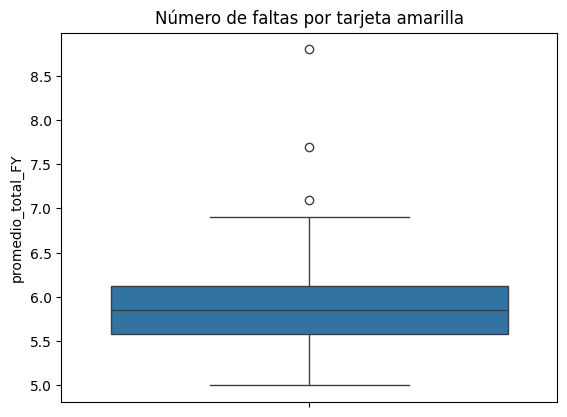

In [162]:
sns.boxplot(tabla_equipo['promedio_total_FY'])
plt.title('Número de faltas por tarjeta amarilla')

En esta gráfica podemos ver 2 cosas:
- Hay varios outliers que analizaremos mas adelante, el por qué de esos valores.
- El rango intercuartílico está aproximadamente entre 5.6 y 6.2, situando la media y la mediana cercano al 5.9

Text(0.5, 1.0, 'Número de faltas por tarjeta amarilla')

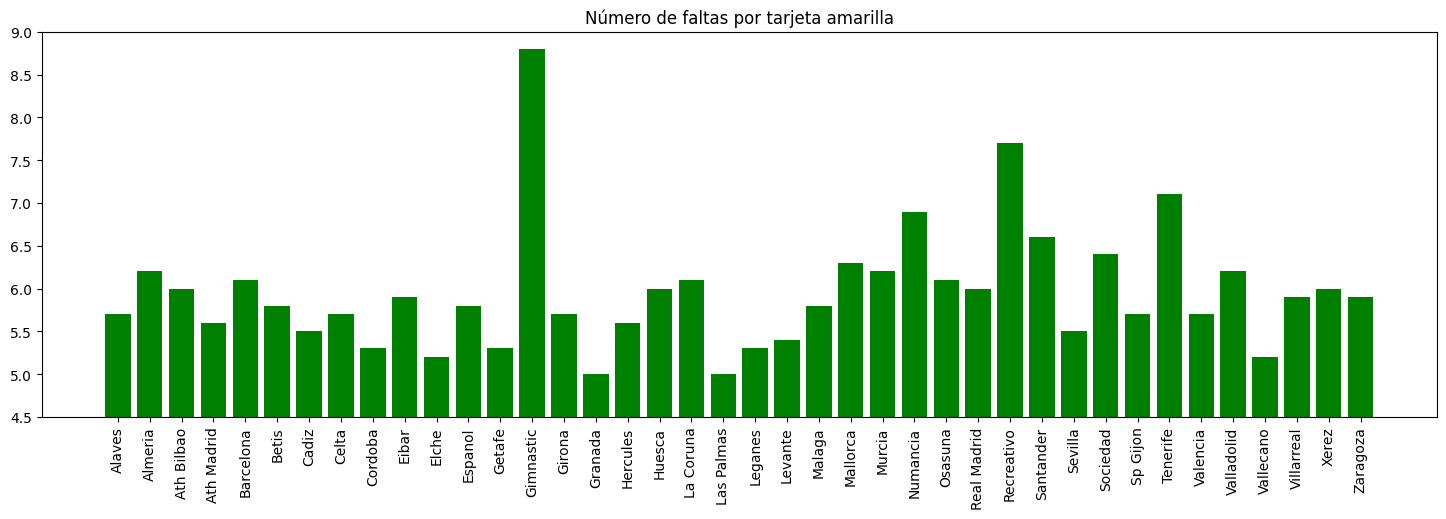

In [163]:
plt.figure(figsize=(18,5))
plt.bar(height=tabla_equipo['promedio_total_FY'], x=tabla_equipo['Equipo'], color = 'g')
plt.ylim(4.5,9)
plt.xticks(rotation=90);
plt.title('Número de faltas por tarjeta amarilla')

En esta gráfica, donde los valores representan a la cantidad de faltas que necesita hacer un equipo para que le saquen una tarjeta amarilla, observamos que:
- Los outliers identificados anteriormente son de equipos que han jugado pocas temporadas en primera, por lo que sus valores de promedio, dependerán del criterío de faltas/tarjeta que hubiera esa temporada en concreto. Mas adelante veremos como ese criterio, puede variar mucho depende de la temporada.
- El criterio que se aplica a los equipos "grandes", es practicamente el mismo que se aplica a los equipos mas "humildes", colocando a equipos como Barcelona o Real Madrid, con 6.14 y 6.02 respectivamente, dentro del rango intercuartílico. También destaca ver, como el Atlético de Madrid con 5.64, es mas perjudicado que otros equipos muy habituales en primera como Real Sociedad con 6.48 u Osasuna con 6.10

> El segundo estudio será sobre los penaltis

Text(0.5, 1.0, 'Número de ataques por penalti')

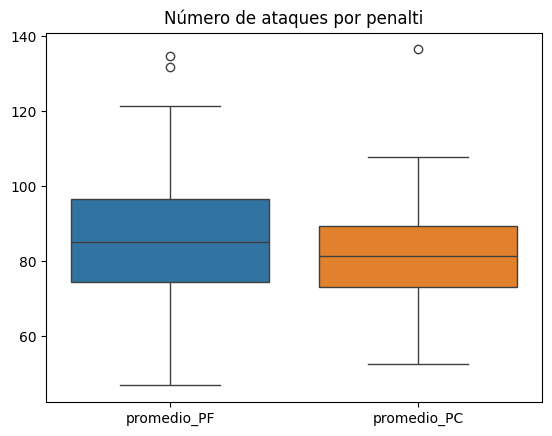

In [164]:
plt.figure()
sns.boxplot((promedio_penaltis_total['promedio_PF'],promedio_penaltis_total['promedio_PC']))
plt.title('Número de ataques por penalti')


En esta gráfica observamos:
- Hay varios outliers que estudiaremos mas adelante
- En el gráfico de penaltis a favor, el rango intercuartílico se encuentra aproximadamente entre 75 y 95, situando la media en 86.
- En el gráfico de penaltis en contra, el rango intercuartílico se encuentra aproximadamente entre 73 y 91, situando la media en 82. 

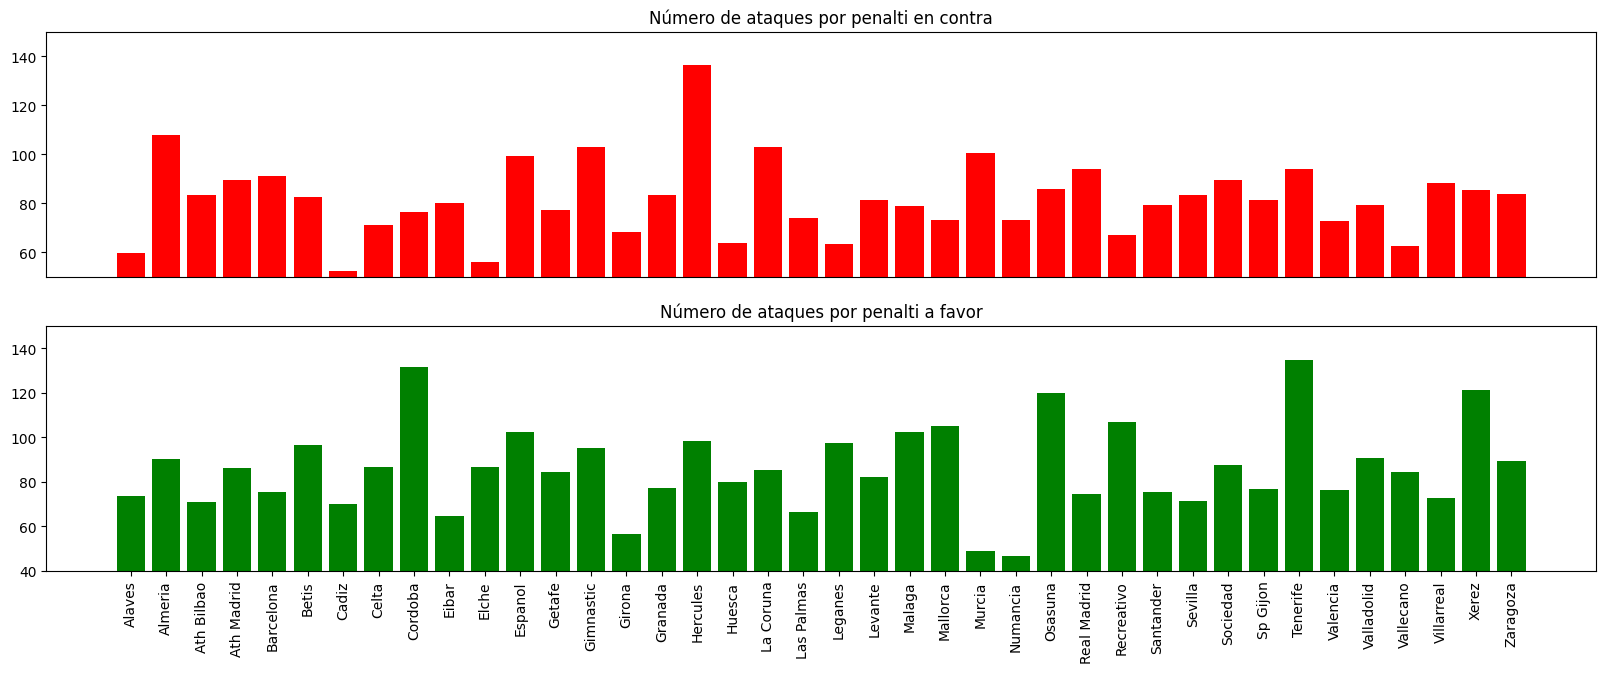

In [165]:
plt.figure(figsize=(20,7))


plt.subplot(2,1,1)
plt.bar(promedio_penaltis_total['Equipo'], promedio_penaltis_total['promedio_PC'], color= 'r' )
plt.xticks(rotation=90);
plt.title('Número de ataques por penalti en contra')
plt.xticks([])
plt.ylim(50,150)

plt.subplot(2,1,2)
plt.bar(promedio_penaltis_total['Equipo'], promedio_penaltis_total['promedio_PF'],color= 'g' )

plt.title('Número de ataques por penalti a favor')
plt.xticks(rotation=90);
plt.ylim(40,150);


En la siguiente gráfica, los valores representan la media de ataques (realizados o recibidos), por equipo para que se pite un penalti. Por tanto, podemos observar que:
- Los outliers identificados anteriormente son de equipos que han jugado pocas temporadas en primera por lo que no tienen una base solida de datos como para tenerlos en cuenta.
- Vemos que equipos como Barcelona con 91 ataques/penalti en contra y 76 ataques/penalti a favor y Real Madrid 94 ataques/penalti en contra y 75 ataques/penalti a favor, salen ligeramente beneficiados respecto a la media de la liga, pero sus valores siguen dentro del rango intercuartílico, por lo que no considero que estén recibiendo un trato favorable, respecto a otros equipos.

### Conclusion

#### Tratando los 2 temas más polémicos de la liga en los últimos 18 años, efectivamente, a los equipos "grandes" no los perjudican ya que sus datos indican que son ligeramente beneficiados con respecto a la media de la liga, pero de ahí a considerar que tienen un trato de favor por su condición de equipo grande, considero que no es correcto.

-------------------------------------------------------------------------------------------------------------

<a id="6"></a> <br>
### 2.- La presión de una afición

##### Analizado el bloque anterior, nos centramos y si los árbitros se ven condicionados por la presión al arbitrar a un equipo, según sea local o visitante. De ser así, analizaremos si influye el tipo de estadio o de afición, ya que no es lo mismo arbitrar en el Santiago Bernabeu, Camp Nou o Sanchez Pizjuan que con todos los respetos en el Salto del Caballo del Toledo.

Para ello, utilizaremos la dataframe "tabla_H_vs_A" donde separo las medias de los equipos según juegan de visitantes o de local
Aquí estudiaremos, la cantidad de faltas que necesita un equipo para que le saquen tarjetas amarilla y la media de tarjetas rojas, a lo largo de todas sus temporadas en primera división.
Además en esta tabla, eliminamos los equipos con menos de 6 temporadas en primera para tener medias mas contundentes.

In [166]:
tabla_H_vs_A = tabla_H_vs_A.drop('Unnamed: 0',axis=1)

In [167]:
tabla_H_vs_A.head()

,Equipo,num_temp,HF,HY,HR,AF,AY,AR,YF_H,YF_A,MediaR_A,MediaR_H
0,Alaves,7,2049,376,17,2001,333,15,5.4,6.0,2.1,2.4
1,Almeria,7,2143,347,24,2034,328,26,6.2,6.2,3.7,3.4
2,Ath Bilbao,18,5098,820,48,5092,870,56,6.2,5.9,3.1,2.7
3,Ath Madrid,18,5068,843,50,5189,974,45,6.0,5.3,2.5,2.8
4,Barcelona,18,4064,578,30,4025,750,37,7.0,5.4,2.1,1.7


>El primer estudio que realizaremos será de tarjetas amarillas

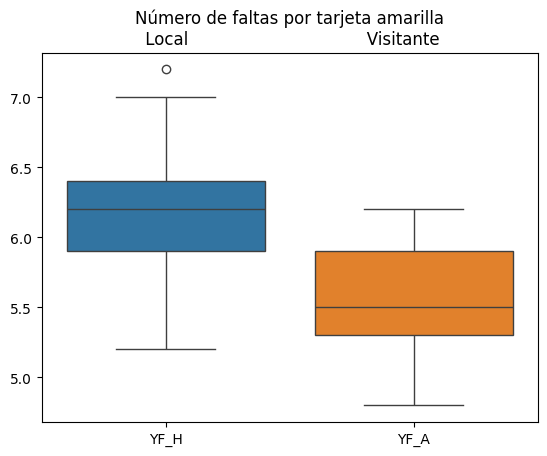

In [168]:
plt.figure()
sns.boxplot((tabla_H_vs_A['YF_H'],tabla_H_vs_A['YF_A']))
plt.title('Número de faltas por tarjeta amarilla\n Local                                  Visitante');

En esta gráfica se observa claramente, como cuando un equipo juega de local, necesita muchas mas faltas para que le saquen una tarjeta amarilla obteniendo una media de aproximadamente 6.2 faltas/tarjeta siendo el equipo local y 5.5 faltas/tarjeta, al ser visitante.

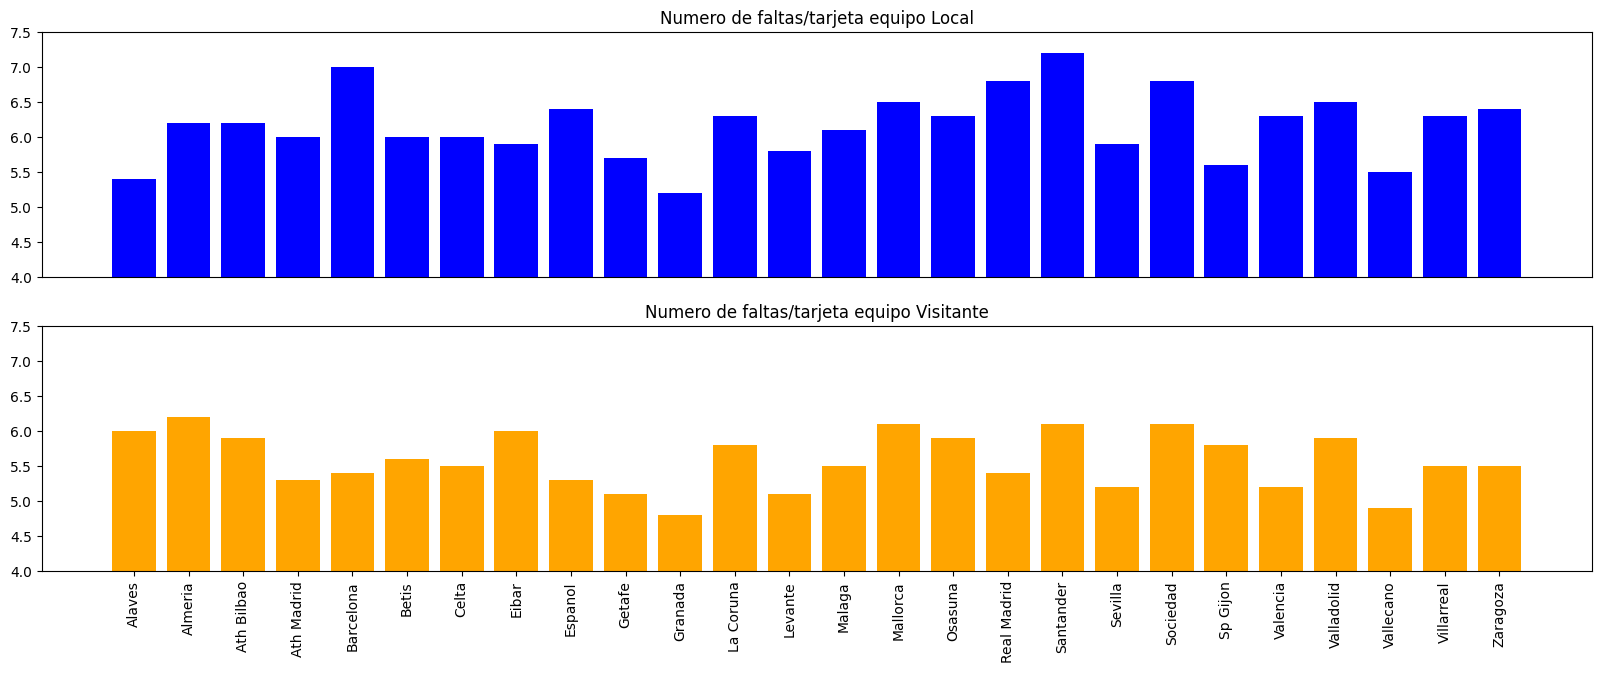

In [169]:
plt.figure(figsize=(20,7))


plt.subplot(2,1,1)
plt.bar(tabla_H_vs_A['Equipo'], tabla_H_vs_A['YF_H'], color= 'b' )
plt.xticks(rotation=90);
plt.title('Numero de faltas/tarjeta equipo Local')
plt.xticks([])
plt.ylim(4,7.5)

plt.subplot(2,1,2)
plt.bar(tabla_H_vs_A['Equipo'], tabla_H_vs_A['YF_A'],color= 'orange' )

plt.title('Numero de faltas/tarjeta equipo Visitante')
plt.xticks(rotation=90);
plt.ylim(4,7.5);

Aquí incluso, podemos observar como en estadios mas grandes o con una afición mas entregada, la diferencia es incluso mayor. Por ejemplo en el Barcelona donde la diferencia es de 7 de local contra 5.4 de visitante, Real madrid con 6.8 de local frente a los 5.4 de visitante o Valencia con 6.3 de local frente a los 5.2 de visitante

>El siguiente estudio que realizaremos será de tarjetas rojas

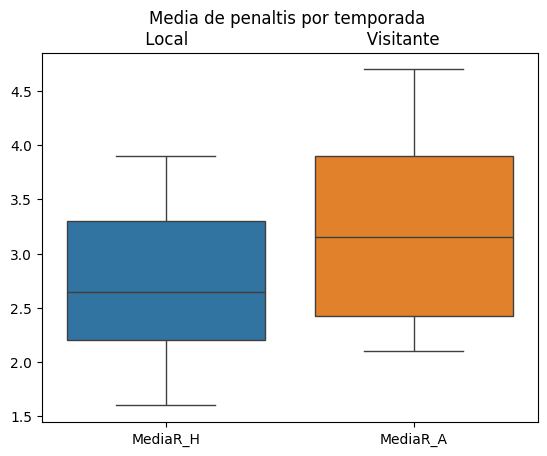

In [170]:
plt.figure()
sns.boxplot((tabla_H_vs_A['MediaR_H'],tabla_H_vs_A['MediaR_A']))
plt.title('Media de penaltis por temporada \n Local                                  Visitante');

Aquí se puede observar, como también sale mucho mas perjudicado un equipo, por el simple hecho de jugar como visitante que como local.

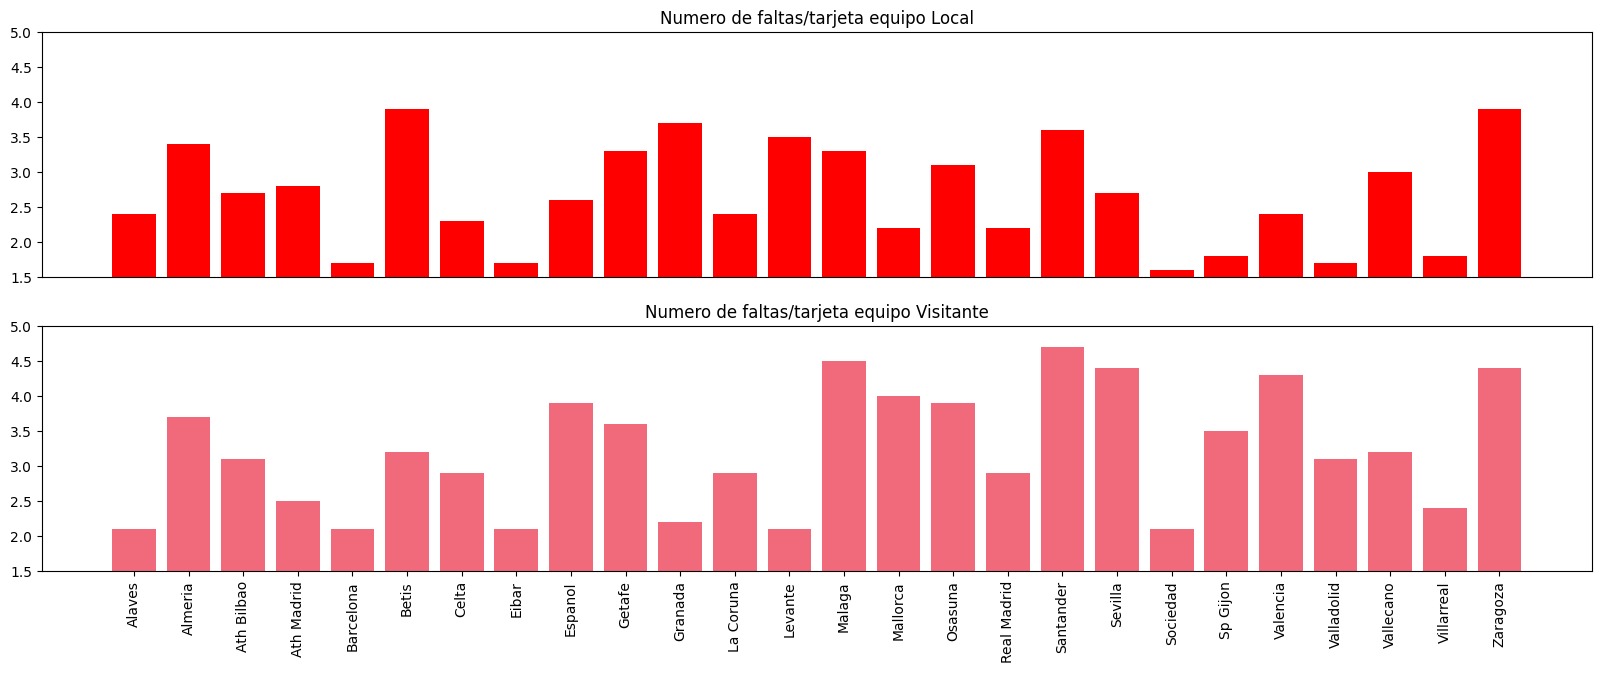

In [171]:
plt.figure(figsize=(20,7))


plt.subplot(2,1,1)
plt.bar(tabla_H_vs_A['Equipo'], tabla_H_vs_A['MediaR_H'], color= 'red' )
plt.xticks(rotation=90);
plt.title('Numero de faltas/tarjeta equipo Local')
plt.xticks([])
plt.ylim(1.5,5)

plt.subplot(2,1,2)
plt.bar(tabla_H_vs_A['Equipo'], tabla_H_vs_A['MediaR_A'],color= '#F06A7C' )

plt.title('Numero de faltas/tarjeta equipo Visitante')
plt.xticks(rotation=90);
plt.ylim(1.5,5);

Este gráfico, muestra como la media de penaltis por equipo sube considerablemente cuando el equipo juega de visitante, obteniendo diferencias bastante grandes como Valencia con 4.3 penaltis de media cuando juega de visitante frente a los 2.4 cuando juega de local o Sevilla con 4.4 de visitante frente a los 2.7 de local.

### Conclusion

#### Si los arbitros se ven condicionados a la hora de pitar a un equipo como local o pitarlo como visitante, la respuesta es SI. Y todos los datos hacen indicar, que mientras más presión hay, por parte de la afición, más se condicionan para pitar en contra de su equipo.

-------------------------------------------------------------------------------------------------------------



<a id="7"></a> <br>
### 3.- Cambios en los criterios arbitrales. 

##### Debido a que los equipos son mas técnicos, ¿tenemos cada vez, un fútbol más aburrido? ¿Se realizan mas faltas rompiendo el ritmo de partido?. Analizaremos como ha evolucionado los aspectos de faltas, tarjetas amarillas y tarjetas rojas de las ultimas 18 temporadas de liga y analizaremos si hay correlación entre ellas.

En esta ocación utilizamos la dataframe "totales_por_temp", donde tenemos los datos de todos los equipos sumados por temporada.

In [172]:
totales_por_temp.head()

,Temporada,Total_F,Total_Y,Total_R
0,05/06,14814,1986,147
1,06/07,13918,1900,157
2,07/08,13182,1875,143
3,08/09,12655,1996,156
4,09/10,12094,1898,152


In [173]:
total_corr = totales_por_temp.corr(numeric_only=True)

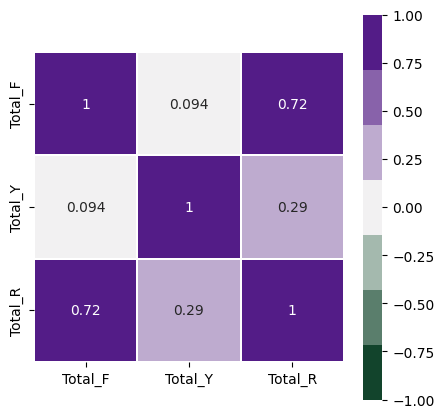

In [174]:
plt.figure(figsize=(5,5))
sns.heatmap(total_corr,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            vmax=1,
            vmin=-1,
            square=True,
            linewidths=.3,
            annot=True);

A priori pensaríamos, que el numero de faltas con las tarjetas amarillas, deberian tener una alta correlación pero en este gráfico vemos que no es así. Sin embargo, si que parec haber una coorelación entre las faltas y las tarjetas rojas.
A continuación analizaremos cual es la causa de la baja correlación que tiene.

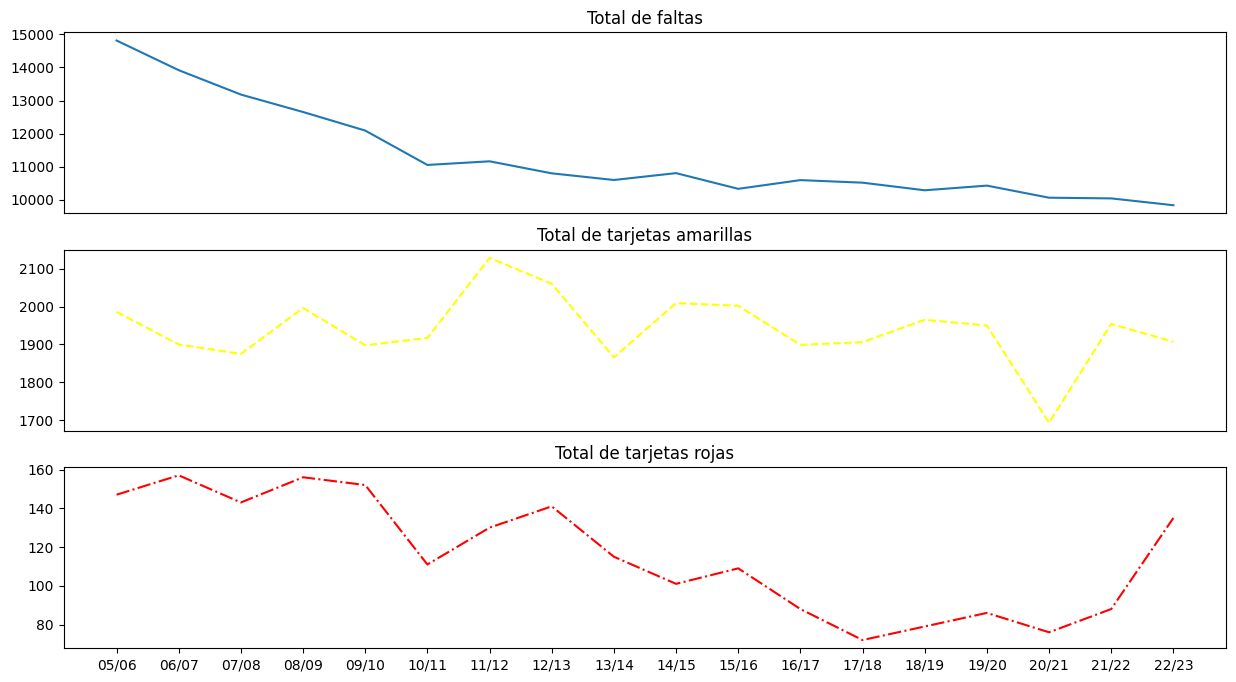

In [175]:
plt.figure(figsize=(15,8))
plt.subplot(3,1,1)
plt.plot(totales_por_temp['Temporada'],totales_por_temp['Total_F'], linestyle='-')
plt.title('Total de faltas')
plt.xticks([])
plt.subplot(3,1,2)
plt.plot(totales_por_temp['Temporada'],totales_por_temp['Total_Y'],color='yellow', linestyle='--')
plt.title('Total de tarjetas amarillas')
plt.xticks([])
plt.subplot(3,1,3)
plt.plot(totales_por_temp['Temporada'],totales_por_temp['Total_R'],color='red', linestyle='-.')
plt.title('Total de tarjetas rojas');

En este gráfico, podemos analizar:
- El total de faltas, ha bajado en estos 18 años mas de un 30%, pasando de casi 15000 faltas por temporada, a menos de 10000.
- Pese a la bajada tan importante de faltas en estos años, en el numero de tarjetas amarillas no se observa una linea descendente, solo picos correspondientes a la variación de criterio de cada temporada. Por este motivo vemos que no existe ninguna correlación entre numero de faltas y de tarjetas amarillas.
- Si embargo, exceptuando la última temporada donde si que se habló de un cambio en el criterio de tarjetas rojas, en la linea de cantidad de tarjetas rojas por temporada, si que se observa un descenso, de casi 150 en la temporada 05/06, a 76 en la temporada 20/21 o 88 en la 21/22, lo que provoca un descenso de casi un 50%. Entonces si se entiende la alta correlación entre ellas que hemos observado en la anterior gráfica. 

### Conclusion

#### Según este estudio, podemos confirmar que los árbitros, son cada vez mas permisivos con las faltas, intendando romper el ritmo de juego lo menos posible. La curiosidad con la que nos encontramos, es que pese a eso, el numero de tarjetas amarillas, no ha variado. Quizas esa permisividad, este causando un exceso de confianza en los equipos que alpensar que no le pitan falta, van mas duros.

-------------------------------------------------------------------------------------------------------------

<a id="8"></a> <br>
### 4.- Irrupciones en el fútbol 

##### En este bloque, analizamos como influye determinados entrenadores o jugadores en sus equipos y cómo han cambiado los datos a partir de su llegada. Para ello, nos centraremos en valores absolutos por equipos. 


En esta ocación utilizamos la dataframe "total_ataques" y "tabla_equipo_3temp" donde tenemos los ataques y las faltas y tarjetas de cada equipo por temporada.

In [176]:
total_ataques = total_ataques.drop('Unnamed: 0',axis=1)

In [177]:
total_ataques.head()

,Equipo,Temporada,AS,RS_V,HS,RS_H,realizados,recibidos
0,Alaves,05/06,166,294,242,230,408,524
1,Alaves,16/17,169,289,220,214,389,503
2,Alaves,17/18,163,313,220,221,383,534
3,Alaves,18/19,185,278,247,223,432,501
4,Alaves,19/20,138,289,178,188,316,477


In [179]:
tabla_equipo_3temp = tabla_equipo_3temp.drop('Unnamed: 0',axis=1)

In [184]:
tabla_equipo_3temp.head()

,Equipo,Temporada,HF,HY,HR,AF,AY,AR,Total_F,Total_Y,Total_R,Promedio_F/Y,num_temp
0,Alaves,05/06,337,45,4,360,43,0,697,88,4,7.9,7
1,Alaves,16/17,274,58,1,266,55,4,540,113,5,4.8,7
2,Alaves,17/18,311,65,4,292,44,0,603,109,4,5.5,7
3,Alaves,18/19,276,50,0,272,51,1,548,101,1,5.4,7
4,Alaves,19/20,320,62,1,301,47,6,621,109,7,5.7,7


>LLegada de Diego Pablo Simeone al Atlético de Madrid

In [188]:
ataque_Atleti = total_ataques[total_ataques['Equipo'] == 'Ath Madrid']
faltas_Atleti = tabla_equipo_3temp[tabla_equipo_3temp['Equipo'] == 'Ath Madrid']


In [254]:
ataque_Atleti.head()

,Equipo,Temporada,AS,RS_V,HS,RS_H,realizados,recibidos
32,Ath Madrid,05/06,237,236,302,217,539,453
33,Ath Madrid,06/07,247,214,325,190,572,404
34,Ath Madrid,07/08,228,231,289,197,517,428
35,Ath Madrid,08/09,231,285,329,202,560,487
36,Ath Madrid,09/10,227,281,325,232,552,513


(400.0, 800.0)

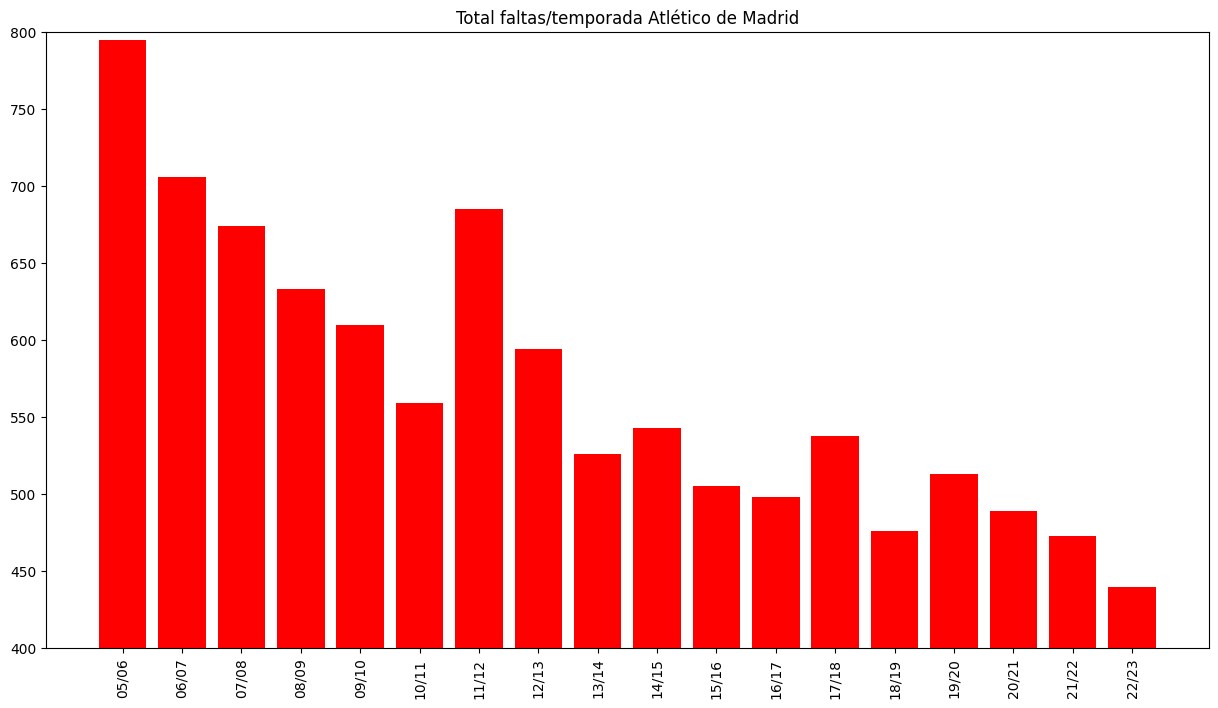

In [194]:
plt.figure(figsize=(15,8))
plt.bar(faltas_Atleti['Temporada'], faltas_Atleti['Total_F'], color= 'red' )
plt.xticks(rotation=90);
plt.title('Total faltas/temporada Atlético de Madrid')
plt.xticks()
plt.ylim(400,800)

Al igual que en el bloque anterior, en el que se observaba como baja el numero de faltas a medida que pasan las temporadas, en este gráfico solo del Atlético de Madrid, también se puede observar esa linea descendente excepto en la temporada 11/12 donde se observa un pico considerable. Efectivamente coincide con la llegada de Simeone como entrenador del Atlético de Madrid donde la cantidad de faltas de su equipo aumenta de 560 a 685 mientras que según la proyección que llevaba, se preveía que estaría en torno a 520 faltas, obteniendo una diferencia de 160 faltas más de lo previsto sin su llegada.

A continuación vamos a analizar como ha influido su llegada al nivel de competitividad de su equipo.

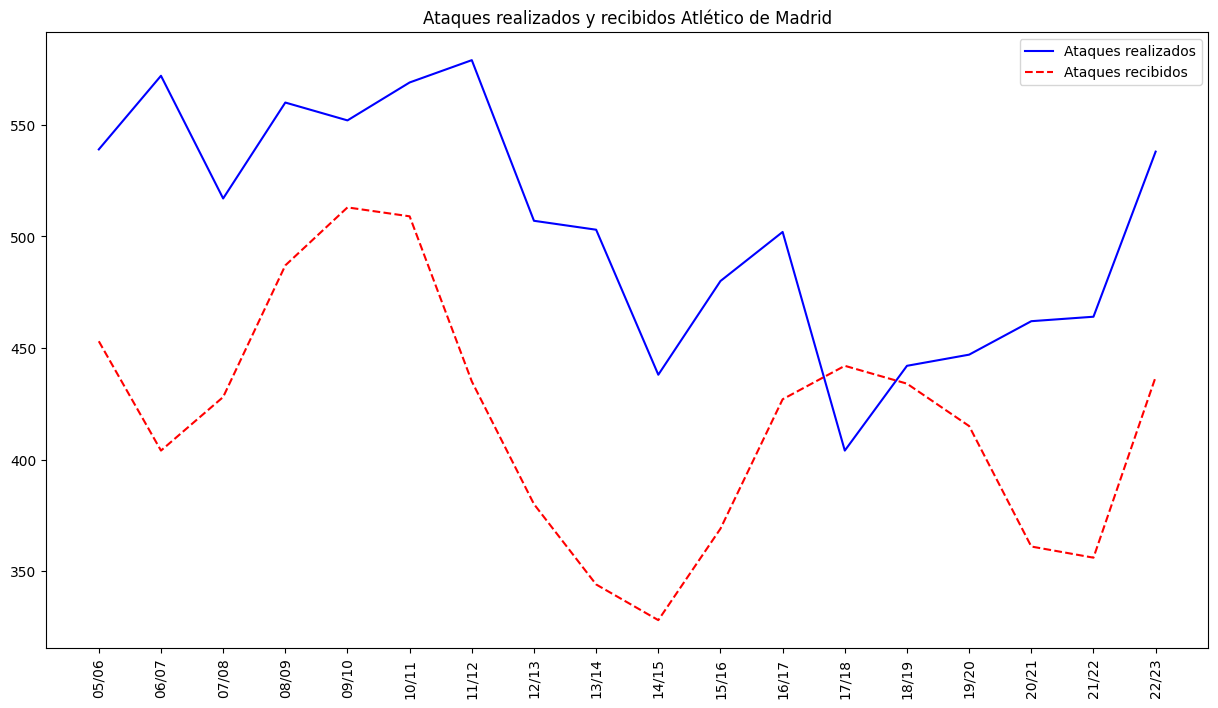

In [208]:
plt.figure(figsize=(15,8))
plt.plot(ataque_Atleti['Temporada'],ataque_Atleti['realizados'],color = 'blue', linestyle='-',label = 'Ataques realizados')
plt.plot(ataque_Atleti['Temporada'],ataque_Atleti['recibidos'], color = 'red', linestyle='--',label = 'Ataques recibidos')
plt.legend()
plt.title('Ataques realizados y recibidos Atlético de Madrid')
plt.xticks(rotation=90);

En esta gráfica, se puede ver como en sus primeros años, consigue construir un equipo mucho mas defensivo y sólido, incluso haciéndolo ganar la liga 13/14 donde la diferencia entre ataques realizados y recibidos es la mas notable, 344 recibidos por 503 realizados. Esto también perjudica al ataque ya que parece que hay un cierta correlación entre los ataques realizados y los recibidos. Además hay 3 giros considerables en la gráfica:
- El primero, en las temporadas 15/16 y 16/17, donde apreciamos que un aumento de ataques realizados y recibidos. Coincide con la incorfomidad por parte de la afición del Atlético con un juego, que pese a los buenos resultados, consideraban "racano" por lo que pidieron fichajes para tener un equipo mas ofensivo.
- El Segundo, en la temporada 17/18 dende observamos un cruce de lineas, es decir, los ataques recibidos superaron a los realizados. Esto ocurrió justo despues de su segunda derrota en la final de champions contra el Real Madrid, donde incluso Simeone se planteó su continuidad.
- El tercero, tras varios años de dudas en la temporada 20/21, vuelve a construir el equipo desde atrás consiguiendo de nuevo una mayor solidez defensiva obteniendo un total de 462 ataques realizados frente a los 361 recibidos, que le dió su 2º título de liga como entrenador del Atlético de Madrid.

>LLegada de Guardiola como entrenador del Barcelona

In [253]:
ataque_Barca = total_ataques[total_ataques['Equipo'] == 'Barcelona']
ataque_Barca.head()

,Equipo,Temporada,AS,RS_V,HS,RS_H,realizados,recibidos
50,Barcelona,05/06,289,182,374,136,663,318
51,Barcelona,06/07,250,233,300,143,550,376
52,Barcelona,07/08,241,261,322,164,563,425
53,Barcelona,08/09,343,157,364,108,707,265
54,Barcelona,09/10,275,176,319,149,594,325


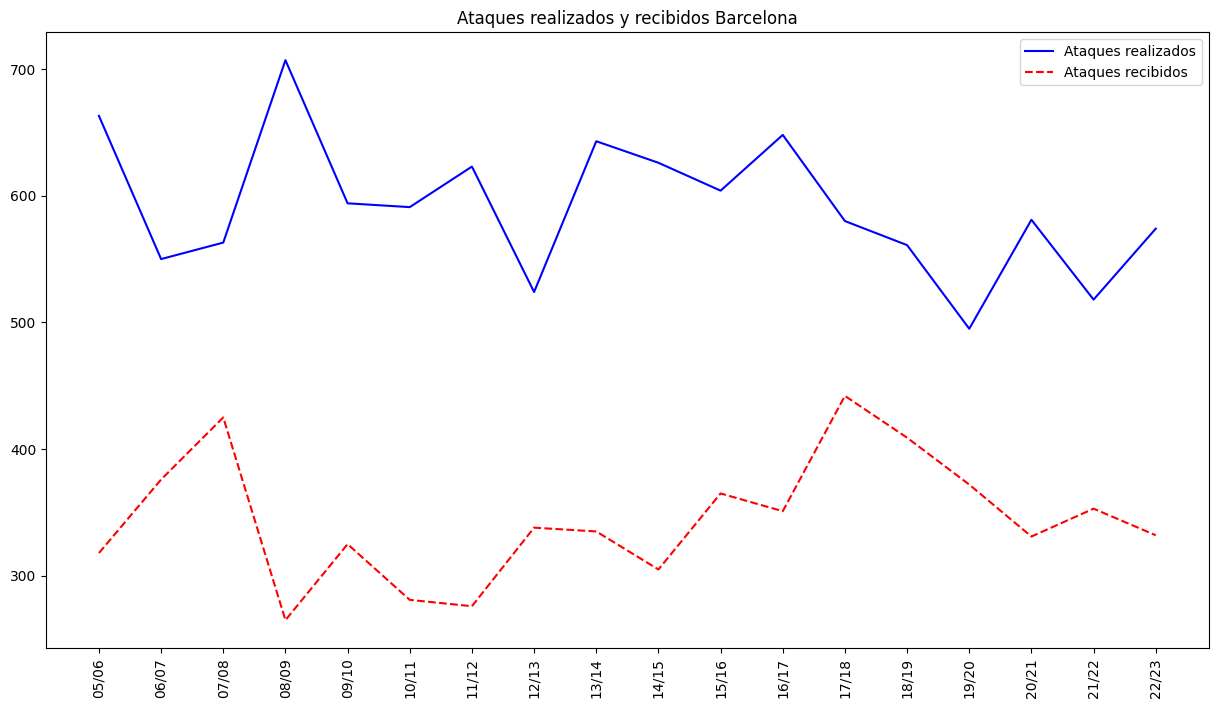

In [217]:
plt.figure(figsize=(15,8))
plt.plot(ataque_Barca['Temporada'],ataque_Barca['realizados'],color = 'blue', linestyle='-',label = 'Ataques realizados')
plt.plot(ataque_Barca['Temporada'],ataque_Barca['recibidos'], color = 'red', linestyle='--',label = 'Ataques recibidos')
plt.legend()
plt.title('Ataques realizados y recibidos Barcelona')
plt.xticks(rotation=90);

En esta gráfica se ve claramente el impacto que tuvo Guardiola en su llagada como entrenador del Barcelona. Tras una temporada muy discreta (07/08) en la que la diferencia de ataques realizados y recibidos fué de 563 y 425 respectivamente, llega Guardiola en la temporada 08/09 obteniendo unos datos de 707 ataques realizados por solo 265 ataque recibidos, consiguiendo quizas, la mejor temporada realizada por un equipo siempre. Tras 4 temporadas de altibajos, en la temporada 11/12 se marcha y se puede observar como bajan el número de ataques realizados y suben el de recibidos hasta 524 y 338 respectivamente.

>LLegada de Cristiano Ronaldo al Real Madrid

In [252]:
ataque_Real_Madrid = total_ataques[total_ataques['Equipo'] == 'Real Madrid']
ataque_Real_Madrid.head()

,Equipo,Temporada,AS,RS_V,HS,RS_H,realizados,recibidos
232,Real Madrid,05/06,253,328,311,289,564,617
233,Real Madrid,06/07,205,275,296,221,501,496
234,Real Madrid,07/08,223,301,332,264,555,565
235,Real Madrid,08/09,275,254,351,261,626,515
236,Real Madrid,09/10,354,199,462,194,816,393


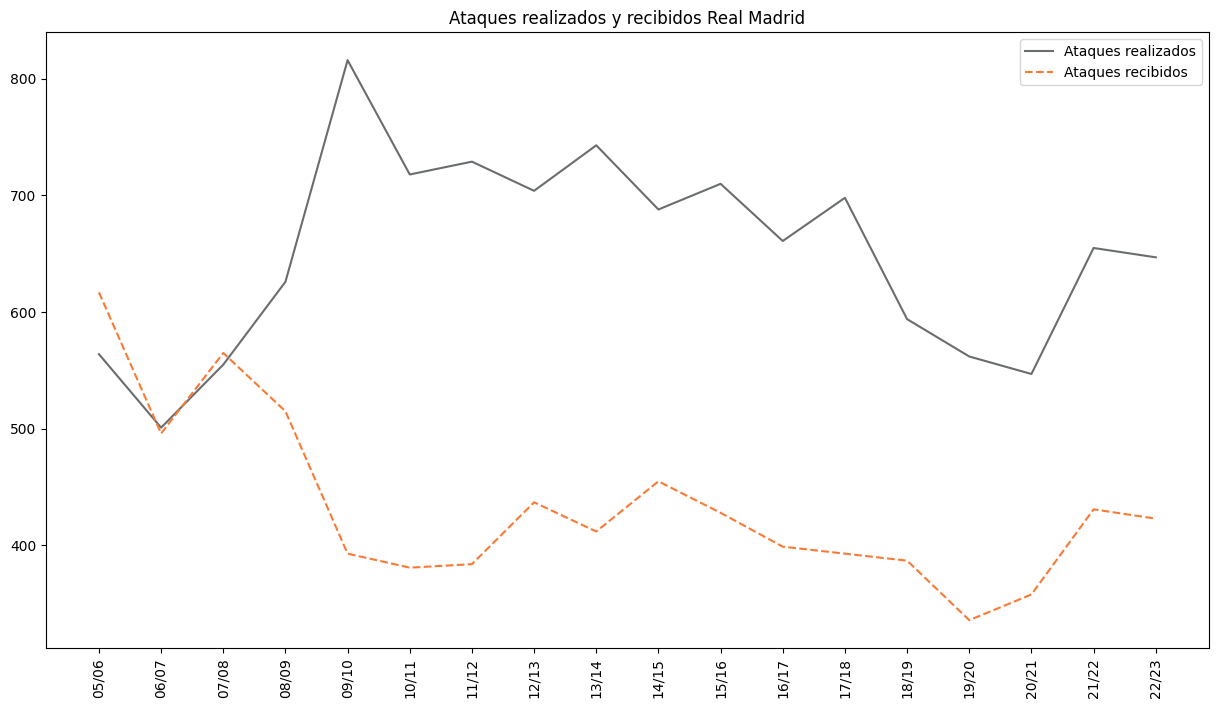

In [222]:
plt.figure(figsize=(15,8))
plt.plot(ataque_Real_Madrid['Temporada'],ataque_Real_Madrid['realizados'],color = '#6A6D70', linestyle='-',label = 'Ataques realizados')
plt.plot(ataque_Real_Madrid['Temporada'],ataque_Real_Madrid['recibidos'], color = '#FA7A35', linestyle='--',label = 'Ataques recibidos')
plt.legend()
plt.title('Ataques realizados y recibidos Real Madrid')
plt.xticks(rotation=90);

En este caso, se ve como las temporadas previas a Cristiano Ronaldo, el Real Madrid no solo no tenia valores positivos en cuanto a ataques realizados, sini que incluso estos eran superados a menudo por los ataques recibidos, convirtiendolo en un equipo muy frágil. Tras la llegada de Cristiano Ronaldo en la temporada 09/10, el numero de ataques se dispara hasta los 816 por los 393 recibidos y así lo alargo durante su etapa en el Real madrid, en la que el valor mas bajo de ataques fue de 661 frente a los 399 en la temporada 16/17.
Desde su marcha en la temporada 17/18, El numero de ataques ha bajado considerablementeno llegando nunca a los numeros a los que el Real Madrid llegaba con él.

### Conclusion

#### Hemos analizado, 3 de las irrupciones mas grandes que ha habido en los últimos años en la liga y efectivamente, podemos afirmar que los datos reafirman la importancia en sus equipos.

-------------------------------------------------------------------------------------------------------------

<a id="9"></a> <br>
### 5.- Caso Negreira y Barçagate 

##### El último apartado ha sido reservado para uno de los escandalos mas grande, en la historia del fúbol español y como será dificil demostrar si hubo algún árbitro que se dejara influenciar por el poder de este señor, vamos a analizar mediante datos, la importancia que tuvo. 


En esta ocación utilizamos la dataframe "ataques_y_penaltis", "tabla_equipo_3temp" y "pagos_negreira".

In [235]:
ataques_y_penaltis = ataques_y_penaltis.drop('Unnamed: 0',axis=1)

In [236]:
ataques_y_penaltis.head()

,Equipo,Temporada,AS,RS_V,HS,RS_H,realizados,recibidos,penaltis_contra,penaltis_favor,promedio_PC,promedio_PF,num_temp
0,Alaves,05/06,166,294,242,230,408,524,10.0,5.0,52.4,81.6,7
1,Alaves,16/17,169,289,220,214,389,503,6.0,4.0,83.8,97.2,7
2,Alaves,17/18,163,313,220,221,383,534,10.0,3.0,53.4,127.7,7
3,Alaves,18/19,185,278,247,223,432,501,6.0,3.0,83.5,144.0,7
4,Alaves,19/20,138,289,178,188,316,477,14.0,6.0,34.1,52.7,7


In [237]:
tabla_equipo_3temp.head()

,Equipo,Temporada,HF,HY,HR,AF,AY,AR,Total_F,Total_Y,Total_R,Promedio_F/Y,num_temp
0,Alaves,05/06,337,45,4,360,43,0,697,88,4,7.9,7
1,Alaves,16/17,274,58,1,266,55,4,540,113,5,4.8,7
2,Alaves,17/18,311,65,4,292,44,0,603,109,4,5.5,7
3,Alaves,18/19,276,50,0,272,51,1,548,101,1,5.4,7
4,Alaves,19/20,320,62,1,301,47,6,621,109,7,5.7,7


In [224]:
pagos_negreira = pagos_negreira.drop('Unnamed: 0',axis=1)

In [225]:
pagos_negreira.head()

,Temporada,pagos
0,05/06,152186
1,06/07,221278
2,07/08,243659
3,"08,09",285398
4,09/10,573398


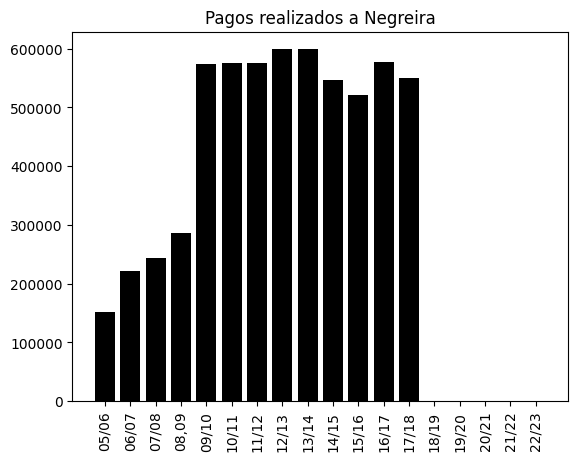

In [230]:
plt.bar(x = pagos_negreira['Temporada'], height = pagos_negreira['pagos'], color = 'black')
plt.title('Pagos realizados a Negreira')
plt.xticks(rotation=90);

Como se puede ver en la gráfica, los pagos se realizaron hasta la temporada 17/18 y según los email rebisados de Negreira al Barcelona, en la 18/19 Negreira estuvo amenanzando al Barcelona con sacar cosas a la luz ya que habían dejado de pagarle.
Pero, ¿Como influyó realmente en los datos y estadísticas del Barcelona cuando dejó de pagar?

In [251]:
faltas_Barca = tabla_equipo_3temp[tabla_equipo_3temp['Equipo'] == 'Barcelona']
faltas_Barca.head()

,Equipo,Temporada,HF,HY,HR,AF,AY,AR,Total_F,Total_Y,Total_R,Promedio_F/Y,num_temp
50,Barcelona,05/06,318,35,1,321,36,5,639,71,6,9.0,18
51,Barcelona,06/07,298,33,4,292,45,3,590,78,7,7.6,18
52,Barcelona,07/08,281,36,2,277,39,3,558,75,5,7.4,18
53,Barcelona,08/09,229,36,3,259,35,3,488,71,6,6.9,18
54,Barcelona,09/10,243,28,3,270,45,2,513,73,5,7.0,18


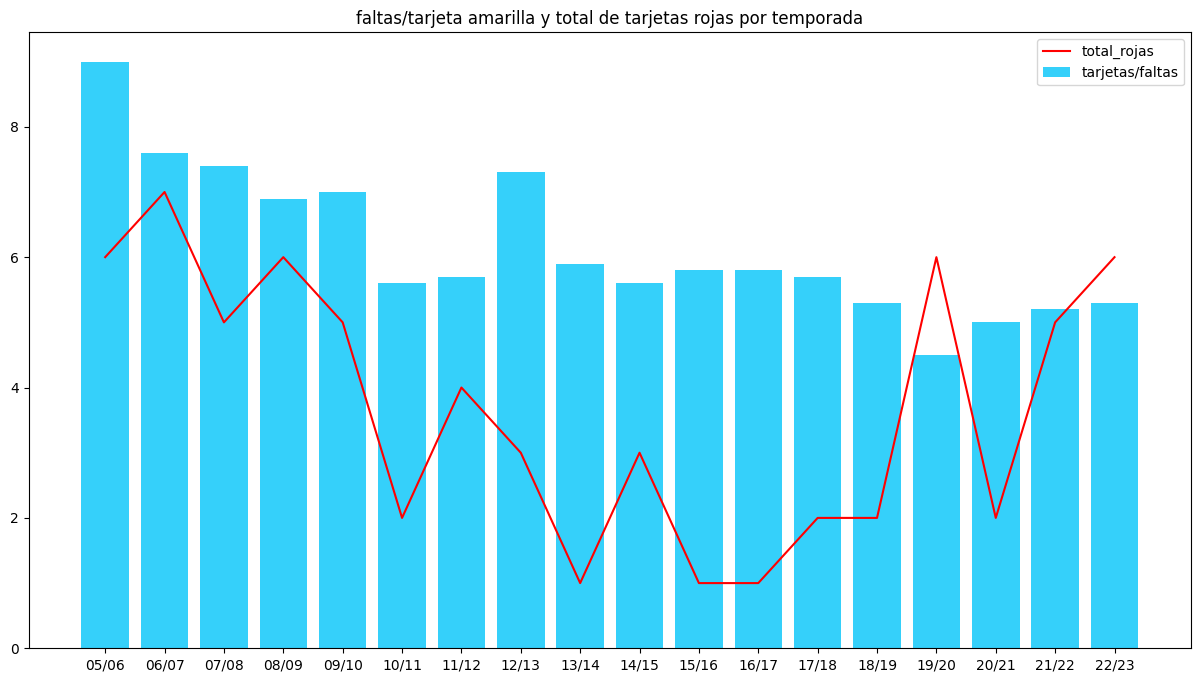

In [248]:
plt.figure(figsize=(15,8))
plt.subplot
plt.bar(faltas_Barca['Temporada'],faltas_Barca['Promedio_F/Y'], color = '#35D0FA', label = 'tarjetas/faltas')
plt.plot(faltas_Barca['Temporada'],faltas_Barca['Total_R'],color = 'red', linestyle='-', label = 'total_rojas')
plt.title('faltas/tarjeta amarilla y total de tarjetas rojas por temporada')
plt.legend();



En esta gráfica se puede observar que tras las amenazas de la temporada 18/19, en la temporada 19/20 se observa un cambio importante, el promedio de faltas por cada tarjeta amarilla baja sensiblemente, de 5.7 o 5.3 de las temporadas anteriores, a 4.5 en la 19/20. Pero el dato mas importante en esta gráfica, es el de tarjetas rojas ya que en la suma de las 4 temporadas anteriores, obtuvo 6 tarjetas rojas, mientras que solo en la 19/20 también obtuvo 6 tarjetas rojas.

In [250]:
penaltis_Barca = ataques_y_penaltis[ataques_y_penaltis['Equipo'] == 'Barcelona']
penaltis_Barca.head()

,Equipo,Temporada,AS,RS_V,HS,RS_H,realizados,recibidos,penaltis_contra,penaltis_favor,promedio_PC,promedio_PF,num_temp
50,Barcelona,05/06,289,182,374,136,663,318,4.0,11.0,79.5,60.3,18
51,Barcelona,06/07,250,233,300,143,550,376,5.0,8.0,75.2,68.8,18
52,Barcelona,07/08,241,261,322,164,563,425,11.0,7.0,38.6,80.4,18
53,Barcelona,08/09,343,157,364,108,707,265,3.0,9.0,88.3,78.6,18
54,Barcelona,09/10,275,176,319,149,594,325,1.0,3.0,325.0,198.0,18


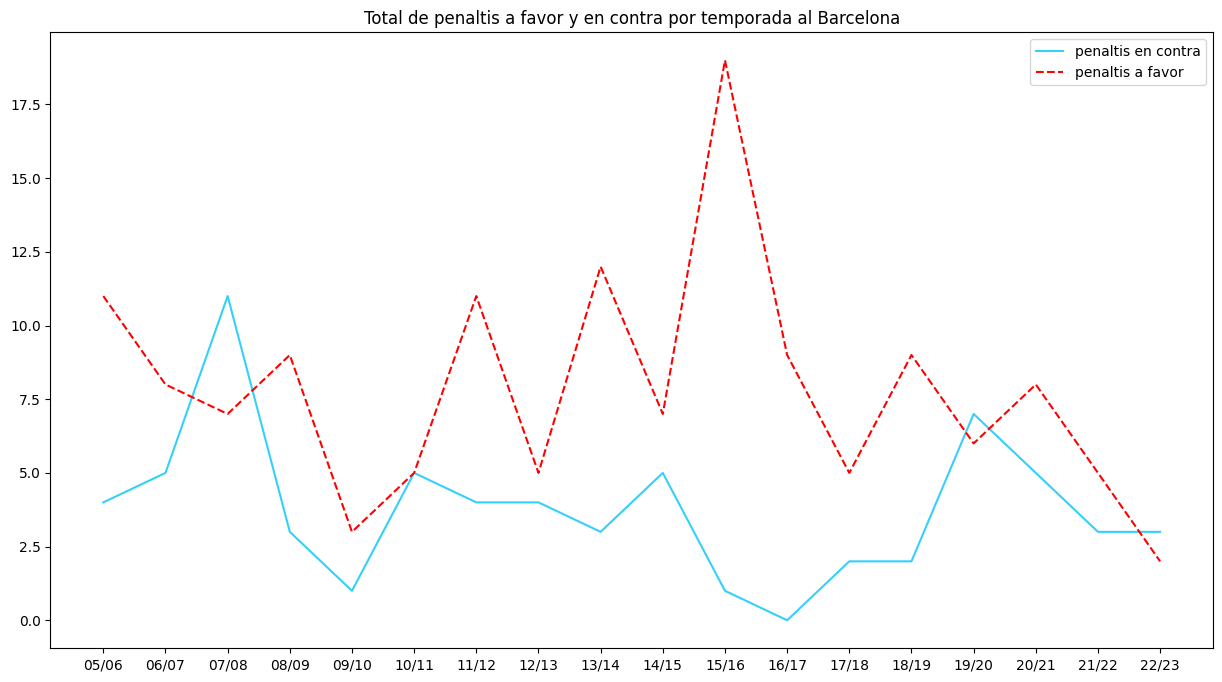

In [258]:
plt.figure(figsize=(15,8))
plt.subplot
plt.plot(penaltis_Barca['Temporada'],penaltis_Barca['penaltis_contra'], color = '#35D0FA', linestyle='-', label = 'penaltis en contra')
plt.plot(penaltis_Barca['Temporada'],penaltis_Barca['penaltis_favor'],color = 'red', linestyle='--', label = 'penaltis a favor')
plt.title('Total de penaltis a favor y en contra por temporada al Barcelona')
plt.legend();

Aquí podemos ver como la diferencia de penaltis pitados a favor y en contra en las 4 temporadas previas a la 19/20 es demasiado significativa, un total de 42 pitados a favor frente a 5 penaltis pitados en contra. En cambio, la temporada 19/20 los penaltis pitados a favor son 6 frente a los 7 en contra, 2 mas que en la suma de las 4 temporadas anteriores.
Para esto comenta que hay una explicación "lógica", si no me llegan, ¿como van a pitar penalti? 
¿De verdad le atacaron tan poco al Barcelona como para que le pitaran tan pocos penaltis en esas 4 temporadas?

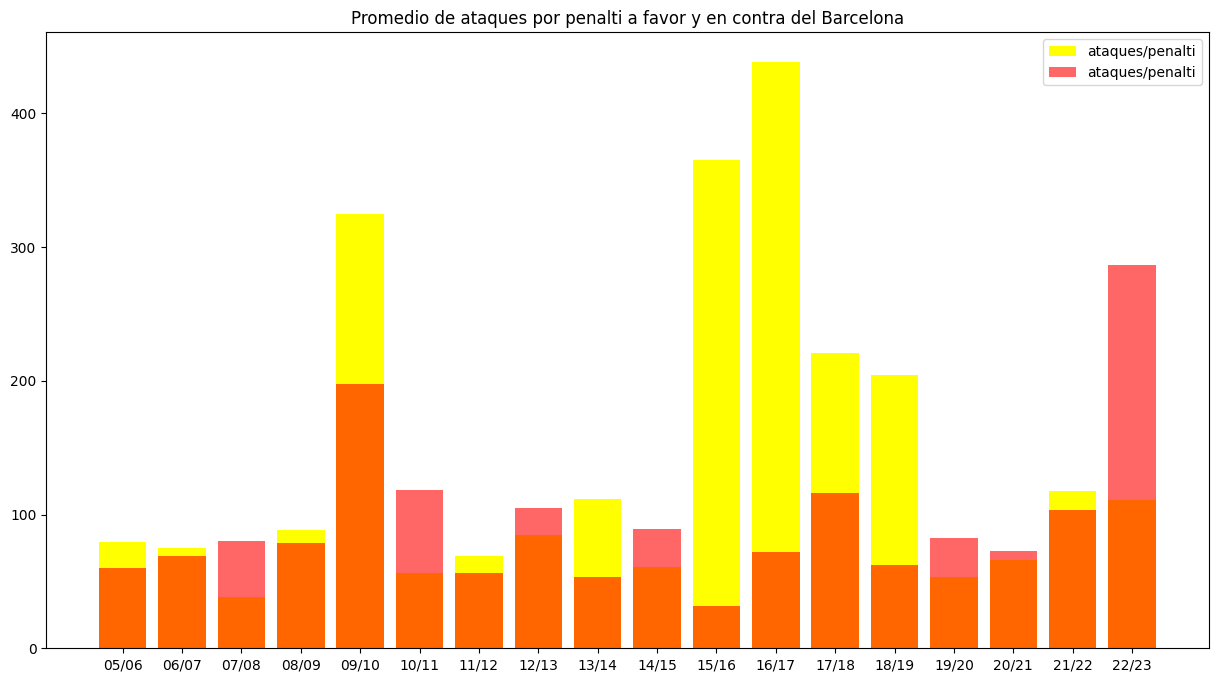

In [266]:
plt.figure(figsize=(15,8))
plt.subplot
plt.bar(penaltis_Barca['Temporada'],penaltis_Barca['promedio_PC'], color = 'yellow', label = 'ataques/penalti')
plt.bar(penaltis_Barca['Temporada'],penaltis_Barca['promedio_PF'],color = 'red',alpha = 0.6, label = 'ataques/penalti')
plt.title('Promedio de ataques por penalti a favor y en contra del Barcelona')
plt.legend();

Pues como podemos observar, la hipótesis de que al Barcelona no le pitan penalti por que no le llegan, no es cierta, ya que en las temporadas previas, los rivales necesitaron mas de 300 ataque de media para que les pitarán un penalti, mientras que al Barcelona, le pitaban una media de un penalti cada 70 ataques. Tras esas 4 temporadas "casualmente" los equipos necesitaron menos ataques que el Barcelona para que le pitarn un penalti. 

### Conclusion

#### Será díficil determinar, si los árbitros pitaban premeditadamente, los partidos del Barcelona, pero los datos hacen indicar que sobretodo en esas 4 temporadas, los datos al favor del Barcelona son demasiado favorables, destrozándos como si de un castillo de naipes se tratara, tras las amenazas de Enriquez Negreira.
#### El juez determinará, como acaba, una de las etapas mas tristes del futbol español.

-------------------------------------------------------------------------------------------------------------